<a href="https://colab.research.google.com/github/XuDou/dive_into_deep_learning_prac/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet-cu100

     |████████████████████████████████| 488.3MB 30kB/s 
     |████████████████████████████████| 13.8MB 29.7MB/s 
ERROR: spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: fastai 1.0.52 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [0]:
import mxnet as mx; mx.__version__

In [0]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
tf.enable_eager_execution()

We want to generate a sythetic dataset according to \\
$\mathbf{y}=\mathbf{X}\mathbf{w}+b+\epsilon$

In [0]:
shape = [1000,2]             #'''1000 data points, two features'''
true_w = np.array([[2], [-3.4]]) #''' the true value of w'''
true_b = 4.2                 #'''the true value of the bias'''
X = tf.Variable(tf.random.normal(
    shape,
    mean=0,
    stddev=1.0,
    dtype=tf.dtypes.float64,
    seed=None,
    name=None
))
epsilon = tf.Variable(tf.random.normal([1000,1],mean=0,stddev=0.01,dtype=tf.dtypes.float64))
label_y = tf.Variable(tf.matmul(X,true_w) + true_b + tf.random.normal([1000,1],mean=0,stddev=0.01,dtype=tf.dtypes.float64))

In [0]:
X[:,0];

In [0]:
label_y;

Instructions for updating:
Colocations handled automatically by placer.


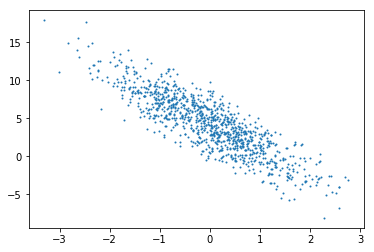

In [9]:
#init = tf.initializers.global_variables()


#with tf.Session() as sess:
 # sess.run(init) 
plt.scatter(X[:,1].numpy(),label_y.numpy(),1)
  
 
  

In [0]:
# Define a loss function

def loss(y_hat,y_predicted):
  return tf.reduce_mean(tf.square(y_hat-y_predicted))

In [0]:
class linear_model():
  def __init__(self):
    self.w = tf.Variable([5.0,2.0])
    self.b = tf.Variable(1.0)
    
  def __call__(self,x):
    return tf.multiply(self.w,x) + self.b
  
  def init_values(self):
    print("w:",self.w.numpy(),"\n","b:",self.b.numpy())
  

In [40]:
model = linear_model()
model([[1.0,2.0],[1.2,2.3]]).numpy()

array([[6. , 5. ],
       [7. , 5.6]], dtype=float32)

In [41]:
model.init_values()

w: [5. 2.] 
 b: 1.0


In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.w, model.b])
  

In [0]:
param = [i for in range(20)]

def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [7]:
for i in range(0,100,3):
  print(i)

0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99


Define the loss function

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y,y_hat.shape)) ** 2 / 2

TensorShape([Dimension(1000), Dimension(1)])

In [0]:
x = tf.Variable([1,2])
y = 2 * x

dy_dx = tf.gradients(y,x)

In [0]:
y = tf.reduce_sum(x)

In [0]:
z = tf.multiply(y,y)

In [0]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
  t.watch(x)
  y = x * x
  z = y * y
dz_dx = t.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = t.gradient(y, x)  # 6.0
del t

In [43]:
for i in range(10):
  for j in range(10):
    if j == 2:
      break
    else:
      print(j)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
